# Описание проекта

Заказчик — кредитный отдел банка. Нужно описать какие клиентские характеристики влияют на погашение кредитов в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

# Цель и задачи

Цель проекта - выявление влияния различных клиентских характеристик на вероятность погашения кредитов.

Задачи:

1. Предварительный анализ данных: Провести анализ данных, выявить пропущенные значения, выбросы и провести исследование распределения переменных.

2. Исследование данных и определение клиентских характеристик, которые могут влиять на погашение кредитов, таких как образование, доход, семейное положение, наличие детей и другие.

3. Выводы и рекомендации: Сделать выводы на основе анализа данных о том, какие клиентские характеристики имеют наибольшее влияние на погашение кредитов. Предложить рекомендации для улучшения процесса выдачи кредитов и снижения рисков.

 


In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np


# 1.  Загрузка данных. Предобработка данных. 

In [2]:
# загрузка данных

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
    

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.shape

(21525, 12)

По общей информации датасета наблюдаем пропуски в столбцах days_employed (общий трудовой стаж в днях) и total_income (ежемесячный доход).

В столбце days_employed (общий трудовой стаж в днях) наблюдаем отрицательные значения, что противоречит логике и лучше изменить тип данных на int. Также для удобства можно поменять тип данных на int в столбце total_income. 


## 1.1. Предобработка данных

### Пропуски

In [6]:
# найдем процентное соотношение пропусков

((data.isna().sum()/len(data)) * 100).round(2)


children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

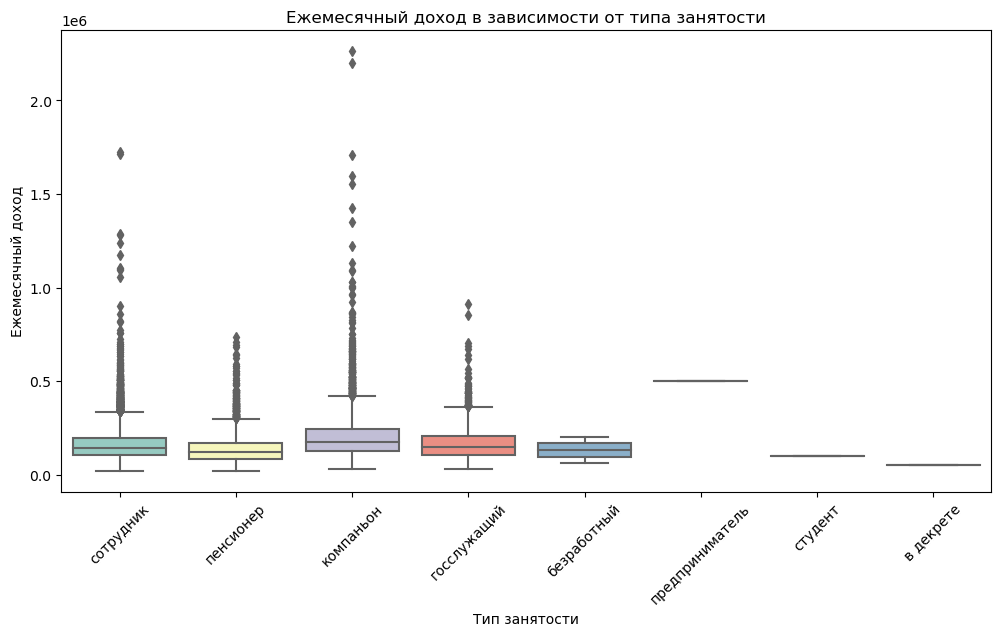

In [7]:
# Создаем график boxplot столбца total_income

plt.figure(figsize=(12, 6))
sns.boxplot(x='income_type', y='total_income', data=data, palette='Set3')

plt.title('Ежемесячный доход в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Ежемесячный доход')

plt.xticks(rotation=45)

plt.show()


Учитывая наличие выбросов на графике, замена пропусков на медианное значение для каждого типа занятости позволит учесть различия в доходах в зависимости от типа работы и избежать искажения данных из-за выбросов.

In [8]:
# замена пропусков в столбце total_income на медианное значение

for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()
    

In [9]:
# заменим все отрицательные значения на положительные в столбце days_employed

data['days_employed'] = data['days_employed'].abs()


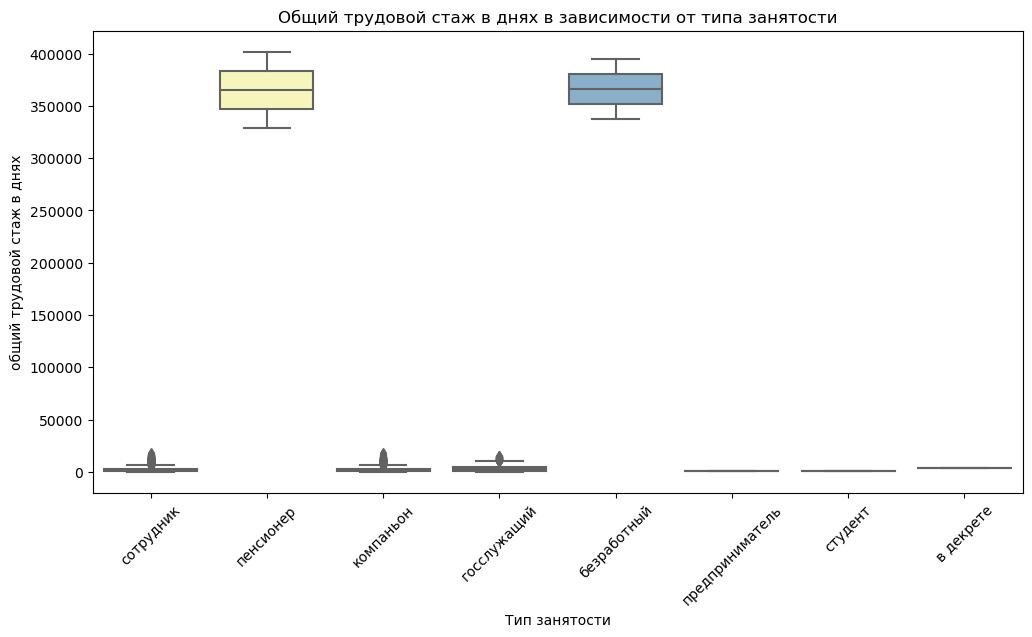

In [10]:
# Создаем график boxplot столбца days_employed

plt.figure(figsize=(12, 6))
sns.boxplot(x='income_type', y='days_employed', data=data, palette='Set3')

plt.title('Общий трудовой стаж в днях в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('общий трудовой стаж в днях')

plt.xticks(rotation=45)

plt.show()


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

А пропуски заменим медианным значением. 

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
# проверка пропусков в датасете после замены 

data.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [13]:
# изменим тип данных у столбцов days_employed и total_income на int

data['days_employed'] = data['days_employed'].astype(int)

data['total_income'] = data['total_income'].astype(int)


### Аномальные значения. Неявные и явные дубликаты. 

In [14]:
# посмотрим на уникальные значения в столбце children

data['children'].unique()


array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [15]:
# посмотрим количество аномальных значений в датасете с значением в столбце children = -1 

data.query('children == -1').size


564

In [16]:
# посмотрим количество аномальных значений в датасете с значением в столбце children = 20

data.query('children == 20').size


912

Достаточно большое количество данных с  значением в столбце количество детей  -1 и 20, скорее всего это техническая ошибка и исправить у нас нет возможности, поэтому эти данные   удалим. 

In [17]:
# удалим из датасета строки с значением в столбце children -1 и 20

data = data[(data['children'] != -1) & (data['children'] != 20)]

data.shape


(21402, 12)

In [18]:
# убедимся, что аномалии в столбце children удалены

data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [19]:
# посмотрим уникальные значения в столбце dob_years

data['dob_years'].unique()


array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [20]:
# найдем количество клиентов с возрастом 0

data.query('dob_years == 0').size


1200

Достаточно большое количество клиентов с возрастом 0, поэтому мы оставим данных клиентов как есть. И для дальнейшего анализа возраст разделим на категории. 

In [21]:
# столбец с значениями возраст  разделим на 3 категории

bins = [-np.inf, 30, 55, np.inf]

labels = ['Молодой возраст', 'Средний возраст', 'Пожилой возраст']

data['age_category'] = pd.cut(data['dob_years'], bins=bins, labels=labels)

data['age_category'].value_counts()


Средний возраст    13248
Пожилой возраст     4349
Молодой возраст     3805
Name: age_category, dtype: int64

In [22]:
def uniq_data(data):
    uniq = data.unique()
    return uniq


In [23]:
print(f"Уникальные значения столбца education: , {uniq_data(data['education'])}\n")

print(f"Уникальные значения столбца family_status: , {uniq_data(data['family_status'])}\n")

print(f"Уникальные значения столбца gender: , {uniq_data(data['gender'])}\n")

print(f"Уникальные значения столбца purpose: , {uniq_data(data['purpose'])}\n")

print(f"Уникальные значения столбца debt: , {uniq_data(data['debt'])}\n")


Уникальные значения столбца education: , ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

Уникальные значения столбца family_status: , ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

Уникальные значения столбца gender: , ['F' 'M' 'XNA']

Уникальные значения столбца purpose: , ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'опе

In [24]:
# в столбце education наблюдаем неявные дубликаты, 
# поэтому все значения приведем в нижний регистр

data['education'] = data['education'].str.lower()


In [25]:
# найдем количество строк с значением XNA в столбце gender

data.query('gender == "XNA"').size


13

In [26]:
# строк с значением XNA в столбце  gender мало, поэтому удалим их

data = data[data['gender'] != "XNA"]


In [27]:
# найдем количество явных дубликатов

data.duplicated().sum()

71

In [28]:
# удалим явные дубликаты

data = data.drop_duplicates()


In [29]:
# для удобства анализа значения столбца purpose разделим на категории

def categorize_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'недв' in purpose or 'жил' in purpose:
        return 'операции с недвижимостью'
    elif 'свад' in purpose:
        return 'проведение свадьбы'
    elif 'образ' in purpose:
        return 'получение образования'
    else:
        return 'другое'
    

data['purpose_category'] = data['purpose'].apply(categorize_purpose)

data['purpose_category'].value_counts()


операции с недвижимостью    10750
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

Для удобства анализа значения столбца total_income разделим на категории.

In [30]:
# посмотрим описательную статистику столбца total_income

data['total_income'].describe().round(2)


count      21330.00
mean      165340.94
std        98315.94
min        20667.00
25%       107503.00
50%       142594.00
75%       195836.75
max      2265604.00
Name: total_income, dtype: float64

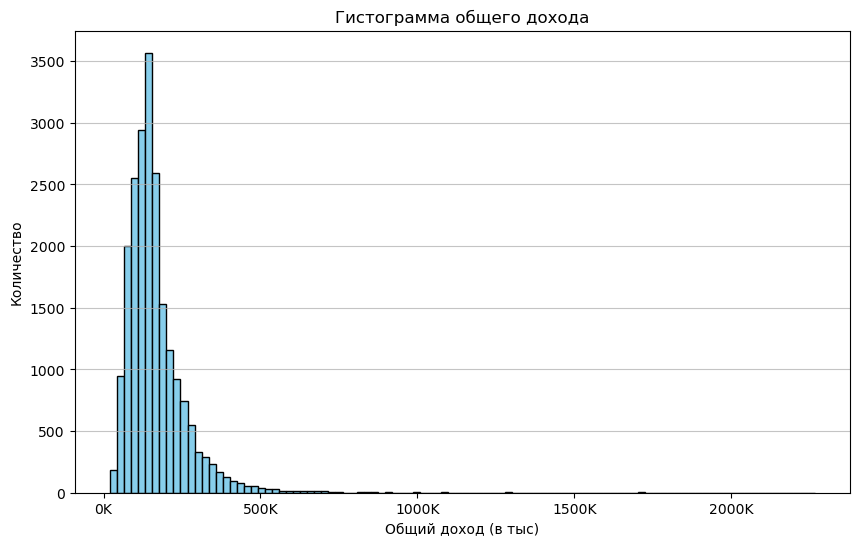

In [31]:
# построим гистограмму

plt.figure(figsize=(10, 6))
plt.hist(data['total_income'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Общий доход (в тыс)')
plt.ylabel('Количество')
plt.title('Гистограмма общего дохода')

# Форматирование оси x для отображения данных в тысячах
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-3))
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(axis='y', alpha=0.75)
plt.show()


Описательная статистика и гистограмма показывает, что в столбце total_income наблюдаются выбросы. 

In [32]:
# Определяем квантили
quantiles = data['total_income'].quantile([0, 0.25, 0.5, 0.75, 1])

print(f"Диапазон значений для первого квантиля: от {quantiles[0]} до {quantiles[0.25]}")
print(f"Диапазон значений для второго квантиля: от {quantiles[0.25]} до {quantiles[0.5]}")
print(f"Диапазон значений для третьего квантиля: от {quantiles[0.5]} до {quantiles[0.75]}")
print(f"Диапазон значений для четвертого квантиля: от {quantiles[0.75]} до {quantiles[1]}")


Диапазон значений для первого квантиля: от 20667.0 до 107503.0
Диапазон значений для второго квантиля: от 107503.0 до 142594.0
Диапазон значений для третьего квантиля: от 142594.0 до 195836.75
Диапазон значений для четвертого квантиля: от 195836.75 до 2265604.0


In [33]:
# разделим столбец total_income на 4 категории с учетом квантилей

q=[0, 0.25, 0.5, 0.75, 1]

labels=['Низкий', 'Средний', 'Высокий', 'Очень высокий']

data['income_category'] = pd.qcut(data['total_income'], q=q, labels=labels)

data['income_category'].value_counts()


Средний          5450
Низкий           5333
Очень высокий    5333
Высокий          5214
Name: income_category, dtype: int64

Разделение общего дохода на категории на основании квантилей, показывает, что первый и четвертый квантиль имеет очень большой разрыв между границами диапазона, поэтому правильней разделить на категории на основании среднего, минимального и максимального значения. 

In [34]:

bins = [0, 30000, 50000, 200000, 1000000, float('inf')]

labels = ['0–30000', '30001–50000', '50001–200000', '200001–1000000', '1000001 и выше']

data['total_income_category'] = pd.cut(data['total_income'], bins=bins, labels=labels)

data['total_income_category'].value_counts()


50001–200000      15921
200001–1000000     5013
30001–50000         349
1000001 и выше       25
0–30000              22
Name: total_income_category, dtype: int64

# 2. Исследование данных и определение клиентских характеристик, которые могут влиять на погашение кредитов

In [35]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,income_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,Средний возраст,операции с недвижимостью,Очень высокий,200001–1000000
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,Средний возраст,операции с автомобилем,Средний,50001–200000
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,Средний возраст,операции с недвижимостью,Высокий,50001–200000
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,Средний возраст,получение образования,Очень высокий,200001–1000000
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,Средний возраст,проведение свадьбы,Высокий,50001–200000


В переменной debt, значения 0 и 1 :
- Значение 0 обычно означает, что клиент не имел задолженности по возврату кредитов, то есть кредит был погашен вовремя или без задержек.
- Значение 1 обычно означает, что клиент имел задолженность по возврату кредитов, то есть кредит был погашен с задержкой или не был погашен вовремя.

### 2.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [36]:
# создадим функцию для нахождения количества и процентного соотношения случаев невозврата кредита

def pivot(column_name):
    data_pivot = data.pivot_table(index=[column_name], values=['debt'], aggfunc=['count', 'sum'])
    data_pivot.columns = ['count', 'sum']
    data_pivot['percent_%'] = round((data_pivot['sum'] / data_pivot['count']) * 100, 2)
    data_pivot['proportion_%'] = round((data_pivot['count'] / len(data)) * 100, 2)
    
    return data_pivot.sort_values(by='percent_%', ascending=False)


In [54]:
# создадим функцию для построения графика

def plot_comparison(column_name):
    data_pivot_column = pivot(column_name)

    plt.figure(figsize=(10, 6))

    bar1 = plt.barh(data_pivot_column.index, data_pivot_column['proportion_%'], color='lightcoral', label='Доля кредитов (%)')
    bar2 = plt.barh(data_pivot_column.index, data_pivot_column['percent_%'], color='skyblue', label='Процент задолженностей (%)')

    plt.xlabel('Процент / Доля (%)')
    plt.ylabel(column_name)
    plt.title(f'Сравнение процентного соотношения задолженностей и доли кредитов по {column_name}')
    plt.legend()

    plt.show()

In [55]:
pivot('children')

,count,sum,percent_%,proportion_%
children,,,,
4,41,4,9.76,0.19
2,2052,194,9.45,9.62
1,4808,444,9.23,22.54
3,330,27,8.18,1.55
0,14090,1063,7.54,66.06
5,9,0,0.00,0.04


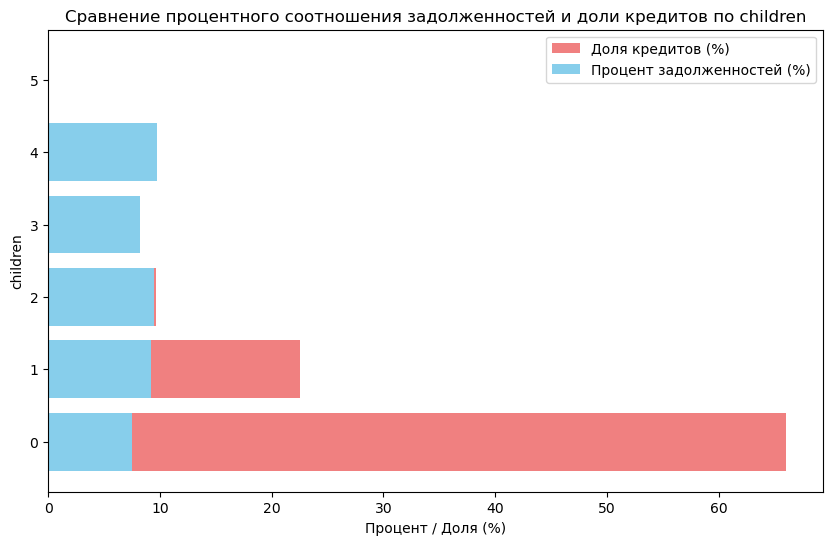

In [56]:
plot_comparison('children')

Вывод: Из полученных данных можно сделать вывод, что есть зависимость между количеством детей и возвратом кредита в срок. Процентное отношение невозврата кредитов показало, что минимальный риск невозврата кредита у клиентов, которые не имеют детей и составляет 7,54%. А самый высокий риск невозврата у тех кто имеет четыре ребенка - 9,76%. Группы с 2 и 1 ребенком имеют схожие проценты случаев не возврата долга (9.45% и 9.23% соответственно), при этом общее количество случаев не возврата в группе с 1 ребенком больше. В целом разница между невозвратом кредита в зависимости от количества детей не существенная. Но стоить отметить, что доля кредитов клиентов "без детей" составляет 66% от общего числа кредитов.

### 2.2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [57]:
pivot('family_status')

,count,sum,percent_%,proportion_%
family_status,,,,
Не женат / не замужем,2796,273,9.76,13.11
гражданский брак,4133,385,9.32,19.38
женат / замужем,12261,927,7.56,57.48
в разводе,1189,84,7.06,5.57
вдовец / вдова,951,63,6.62,4.46


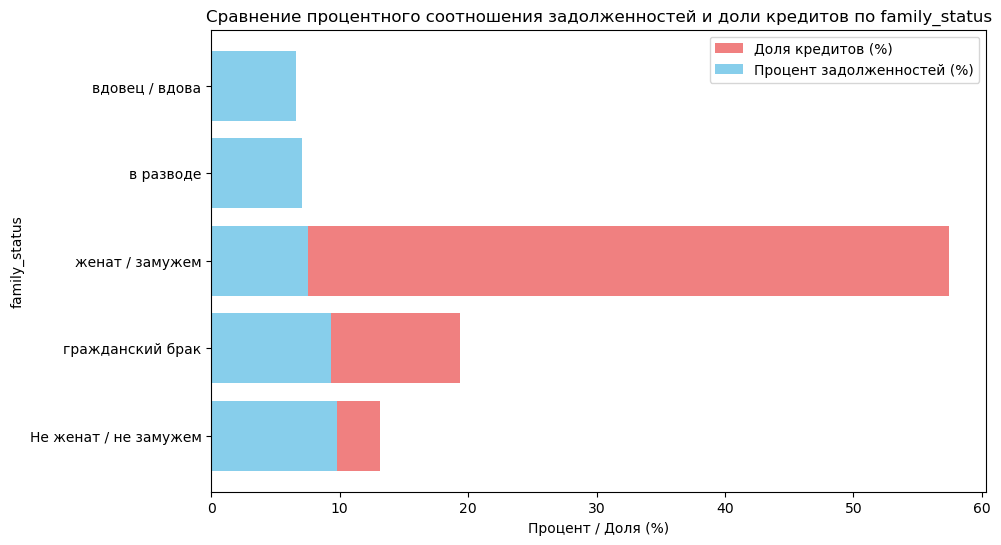

In [58]:
plot_comparison('family_status')

Вывод: Процентное отношение невозвратности кредитов в соотношении с семейным статусом показало, что зависимость между данными существует. Наибольший риск невозврата кредита прослеживается у клиентов со статутосом "Не женат/не замужем" и кто состоит в гражданском браке и составляет 9,76% - 9,32% соответсвенно, что на 2% больше, чем у клиентов со статусом "Женат/замужем"и доля кредитов у клиентов состоящих в браке составляет 57% от общего числа кредитов. Наименьший риск невозврата кредита у клиентов со статусом "вдовец/вдова" и "в разводе" и составляет 6,62% и 7,06% соответственно.

### 2.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [59]:
pivot('total_income_category')

,count,sum,percent_%,proportion_%
total_income_category,,,,
0–30000,22,2,9.09,0.10
50001–200000,15921,1353,8.50,74.64
1000001 и выше,25,2,8.00,0.12
200001–1000000,5013,354,7.06,23.50
30001–50000,349,21,6.02,1.64


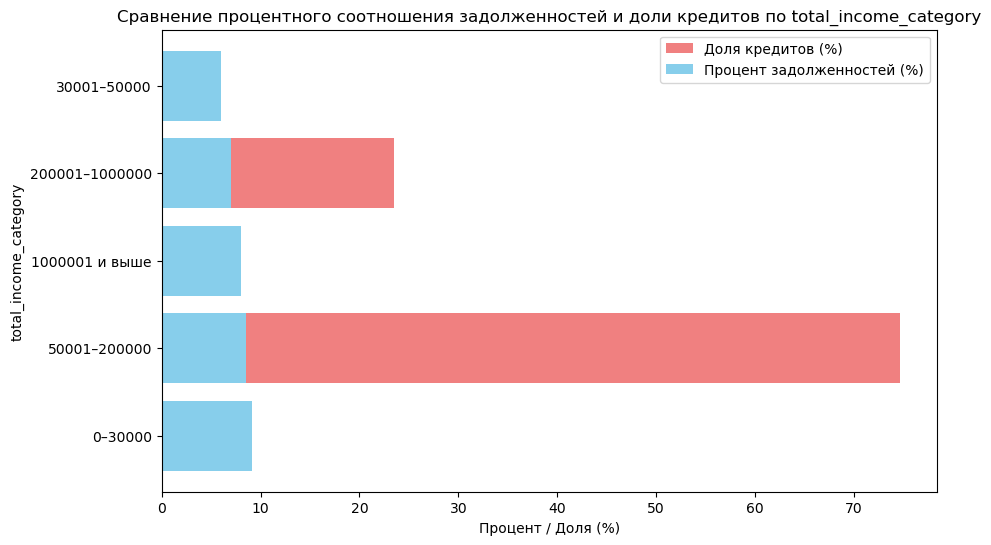

In [60]:
plot_comparison('total_income_category')

Вывод: Наибольший риск невозврата кредита у клиентом с доходностью до 30 тыс. и в промежутке от 50 - 200 тыс. и составляет в среднем 8,8%. А с доходностью 30 - 50 тыс. минимальный риск невозврата кредита и составляет 6%. Наибольшая доля кредитов у клиентов с доходностью 50-200 тыс и составляет около 75% от общего числа кредитов.

### 2.4 Как разные цели кредита влияют на его возврат в срок?

In [61]:
pivot('purpose_category')

,count,sum,percent_%,proportion_%
purpose_category,,,,
операции с автомобилем,4279,400,9.35,20.06
получение образования,3988,369,9.25,18.70
проведение свадьбы,2313,183,7.91,10.84
операции с недвижимостью,10750,780,7.26,50.40


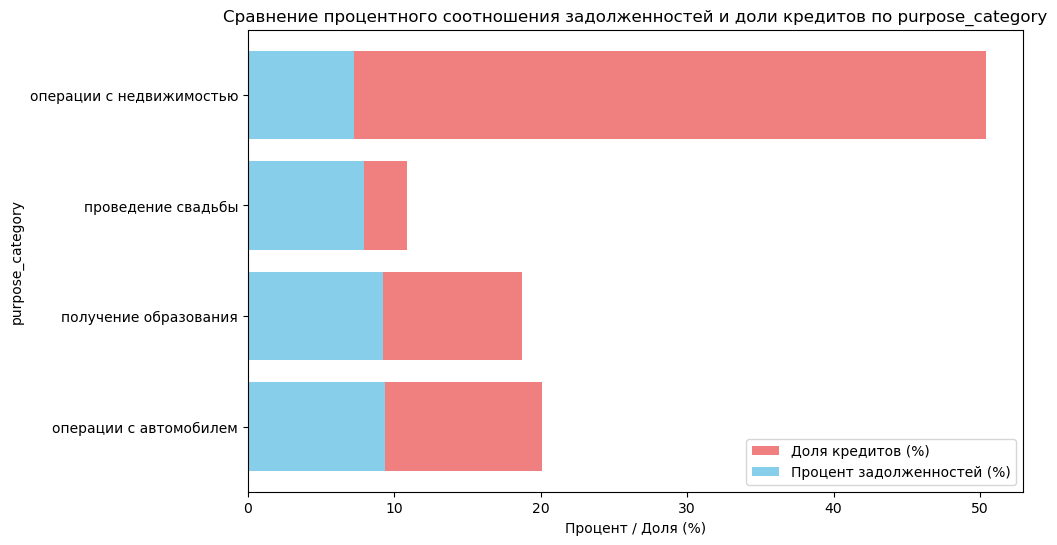

In [62]:
plot_comparison('purpose_category')

Вывод: Риск невозврата по целевым кредитам составляет 8,6%. Наибольший риск невозврата у кредитов на покупку автомобиля и получения образования и составляет 9,3% - 9,2%. Наименьший риск невозврата у кредитов на  операции с недвижимостью и составляет 7,3%, также стоит отметить, что половину всех кредитов составляют кредиты по операциям с недвижемостью.  

### 2.5 Как гендерное различие влияет на возврат кредита в срок?

In [63]:
pivot('gender')

,count,sum,percent_%,proportion_%
gender,,,,
M,7238,743,10.27,33.93
F,14092,989,7.02,66.07


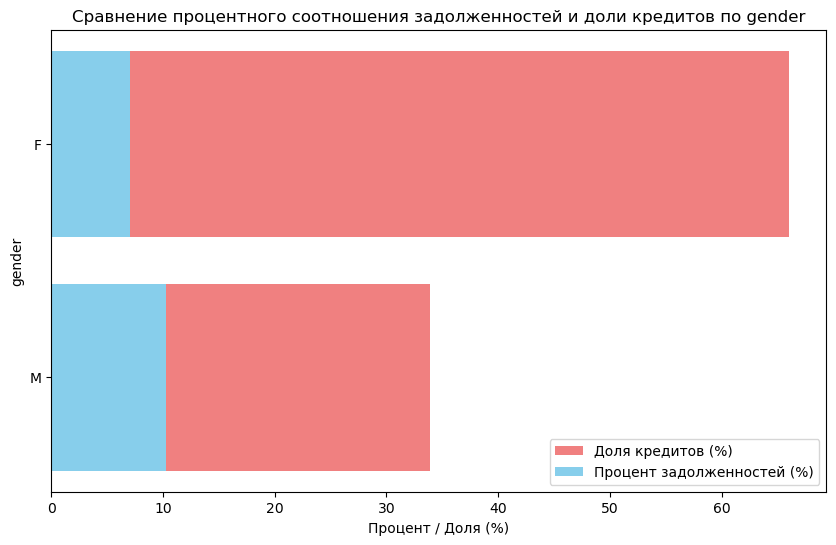

In [64]:
plot_comparison('gender')

Вывод: Женщины оформляют кредиты в 2 раза чаще, чем мужчины. Доля кредитов оформленных женщинами составляет 66%, при этом риск невозврата кредита в срок на 3% больше у мужчин, чем у женщин и составляет 10%. 

### 2.6 Как возраст влияет на возврат кредита в срок?

In [65]:
pivot('age_category')

,count,sum,percent_%,proportion_%
age_category,,,,
Молодой возраст,3798,411,10.82,17.81
Средний возраст,13216,1082,8.19,61.96
Пожилой возраст,4316,239,5.54,20.23


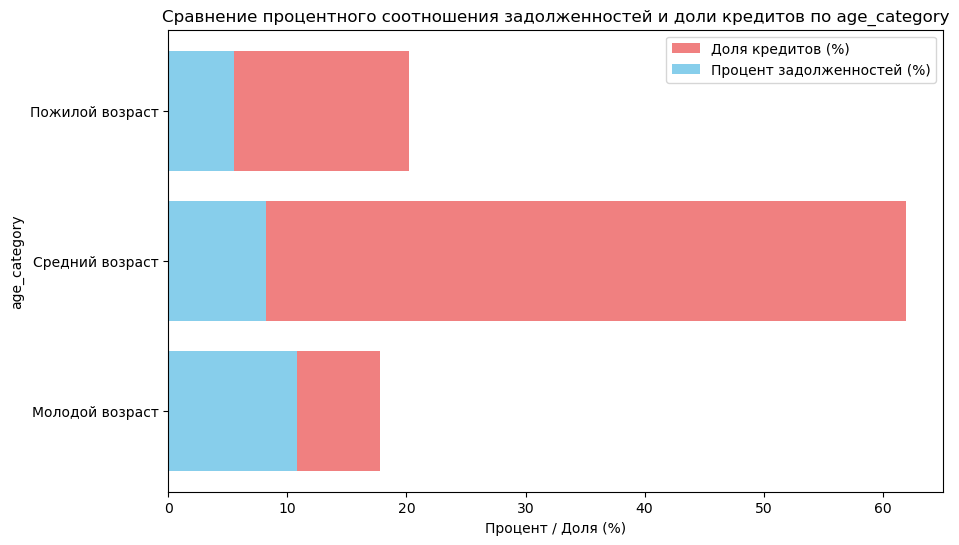

In [66]:
plot_comparison('age_category')

Вывод: Самым рискованным возрастом по невозврату кредита в срок является молодой и составляеят около 11%, а клиенты пожилого возраста имеют наименьший риск невозврата кредита  - 5.5%.  Наибольшая доля кредитов у среднего возраста и составляет около 62%, процент невозврата составлеяет 8%. 

### 2.6 Как образование влияет на возврат кредита в срок?

In [67]:
pivot('education')

,count,sum,percent_%,proportion_%
education,,,,
начальное,282,31,10.99,1.32
неоконченное высшее,740,68,9.19,3.47
среднее,15075,1355,8.99,70.68
высшее,5227,278,5.32,24.51
ученая степень,6,0,0.00,0.03


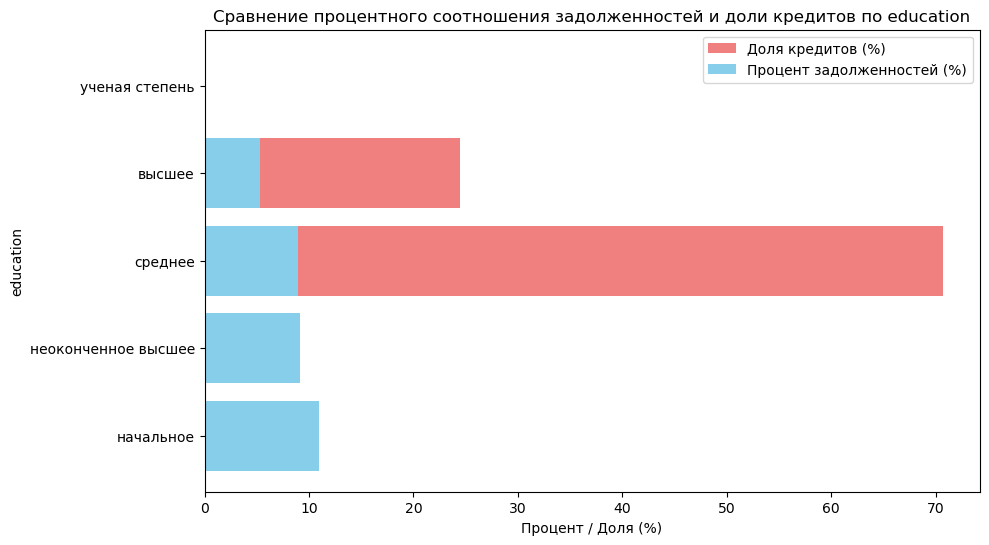

In [68]:
plot_comparison('education')

Вывод: Наибольший процент невозврата кредита в срок у клиентов с начальным образованием и составляет примерно 11%, при этом доля всех кредитов составляет всего 1%. Около 5% невозврата кредита в срок у клиентов с высшим образованием. Наибольшая доля всех кредитов у клиентов со средним образованием и составляет около 71%, а процент невозврата состявляет 9%.

# Общий вывод

Для начала стоит отметить пропуски в датасете. Причиной появления пропусков может являтся неправильный ввод данных или сокрытие информации. Если рассматривать проект по платежеспособности клиентов, то предобработка данных показала, что пропуски имеются в столбцах "общий трудовой стаж в днях (days_employed)" и в "ежемесячном доходе (total_income)". Причиной пропуска в столбце про трудовой стаж, скорее всего является, неправильный ввод данных, так как указывать стаж в днях не самый лучший способ. Что касается столбца про ежемесячный доход, то тут причиной пропусков может быть сокрытие информации.

Результаты, полученные в ходе решения заданий, не дают точных выводов, но помогают сориентироваться в общей зависимости переменных между собой. Учитывае все показатели, клиентов можно подразделить на две категории, с низким и высоким риском невозврата кредита. 

Показатели клиента с минимальным риском невозврата кредита:
без детей
был в браке
имеет средний доход от 30-50 тыс.
цель кредита "операции с недвижимостью"
и желательно чтобы была женщина с высшим образованием и пожилого возраста. 

Показатели клиента с максимальным риском невозврата кредита:
с четырьмя детьми
не в браке
имеет низкий доход до 30 тыс.
цель кредита "приобретение автомобиля" или "получение образования"
мужчина без образования в молодом возрасте.

Отвечая на вопрос, влияют ли клиентские характеристики влияют на погашение кредитов в срок, с увереностью можно сказать, что да. А именно с ростом количества детей в семье, процент невозврата кредита растет. Например с появлением первого ребенка в семье риск невозврата возрастает на 1,69%.
Что касается вопроса влияния семейного положения, то здесь также просматривается зависимоть. Самыми ненадежными клиентами являются одинокие заемщики, которые не состояли в браке, но при этом низкий риск невозврата у вдов и находящихся в разводе. У вдов и находящихся в разводе, риск невозврата кредита уменьшается на 3% по сравнению с "холостыми".